# Лабораторная работа №2

ФИО: Калинин Егор Андреевич
Группа: БИВТ-21-3

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap. 

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 0. Пример импорта данных

In [47]:
import pandas as pd
data = pd.read_csv("exams.csv", sep=',')  # если нужно, можно поменять разделитель
print(data.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


## 2. Описание постановки задачи

Описание:

Исследование направлено на анализ данных. Этот набор данных состоит из оценок, полученных учащимися по различным предметам.

Постановка задачи:

На основе имеющихся данных провести следующие исследования:1.Насколько эффективен курс подготовки к тестированию?
2.Какие основные факторы влияют на результаты тестирования?
3.Каков наилучший способ улучшить результаты учащихся по каждому тесту?
4.Какие закономерности и взаимодействия в данных вы можете обнаружить?

Цели:

A. Понимание структуры и характеристик набора данных
B. Выявление аномалий и выбросов
D. Подготовка данных для дальнейших этапов анализа

Независимые переменные:

gender, race/ethnicity, parental level of education, lunch, test preparation cours, math scor, reading scoe, writing score

Зависимая переменная (Целевое событие):

test preparation course - итоговая оценка ученика по тестам, представленная в  формате none или completed.

## 3. Распределение целевой переменной

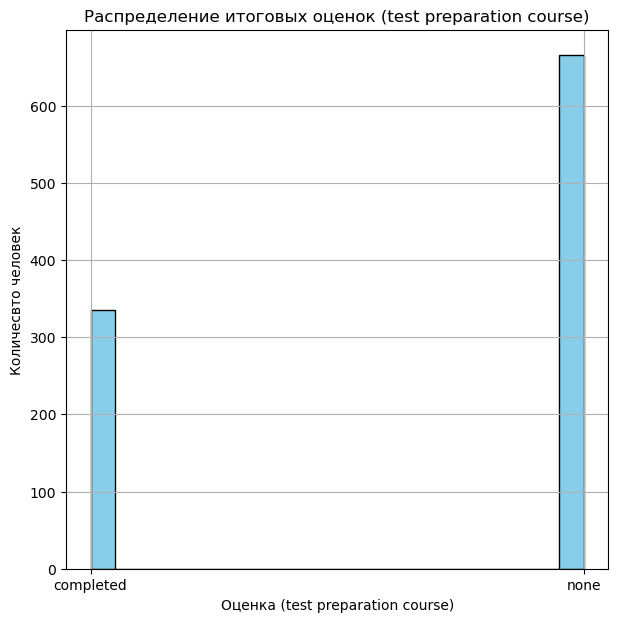

Количество уникальных значений целевой переменной test preparation course: 2
Наиболее часто встречающееся значение: none Количество: 665


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

plt.figure(figsize=(7, 7))
plt.hist(data['test preparation course'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение итоговых оценок (test preparation course)')
plt.xlabel('Оценка (test preparation course)')
plt.ylabel('Количесвто человек')
plt.grid(True)
plt.show()

#Количество уникальных значений целевой переменной
unique_values = data['test preparation course'].nunique()
print("Количество уникальных значений целевой переменной test preparation course:", unique_values)



value_counts = data['test preparation course'].value_counts()
print('Наиболее часто встречающееся значение:', value_counts.idxmax(), 'Количество:', value_counts.max())

На основе анализа выходных данных и графика, можно сделать следующие промежуточные выводы:

1. Целевая переменная test preparation course имеет 2 уникальных значений.

2. Наиболее часто встречающееся значение test preparation course - это none, которое встречается 665 раза.
Также, график “Распределение итоговых оценок (test preparation course)” подтверждает эти выводы. 
Он показывает, что оценка none встречается чаще всего, что соответствует предоставленной информации. 


## 4. Основные статистики по переменным в датасете

In [49]:
print(data.describe(include='all'))

       gender race/ethnicity parental level of education     lunch  \
count    1000           1000                        1000      1000   
unique      2              5                           6         2   
top      male        group C                some college  standard   
freq      517            323                         222       652   
mean      NaN            NaN                         NaN       NaN   
std       NaN            NaN                         NaN       NaN   
min       NaN            NaN                         NaN       NaN   
25%       NaN            NaN                         NaN       NaN   
50%       NaN            NaN                         NaN       NaN   
75%       NaN            NaN                         NaN       NaN   
max       NaN            NaN                         NaN       NaN   

       test preparation course   math score  reading score  writing score  
count                     1000  1000.000000    1000.000000    1000.000000  
unique 

## 5. Основная информация по датасету

In [50]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


## 6. Количество пропусков

In [51]:
mis = data.isnull().sum()
print(mis)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


## 7. Гистограммы 4-ёх признаков

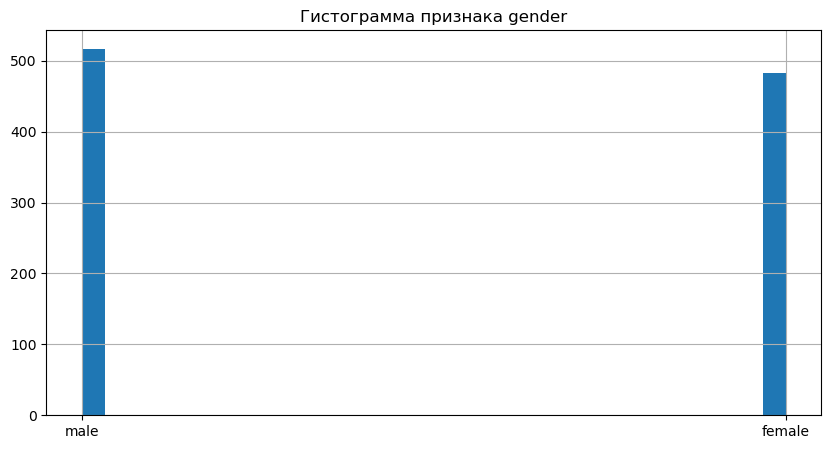

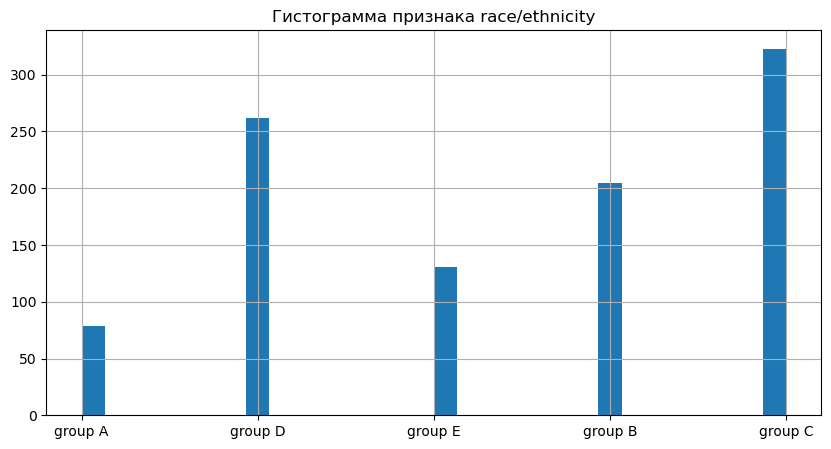

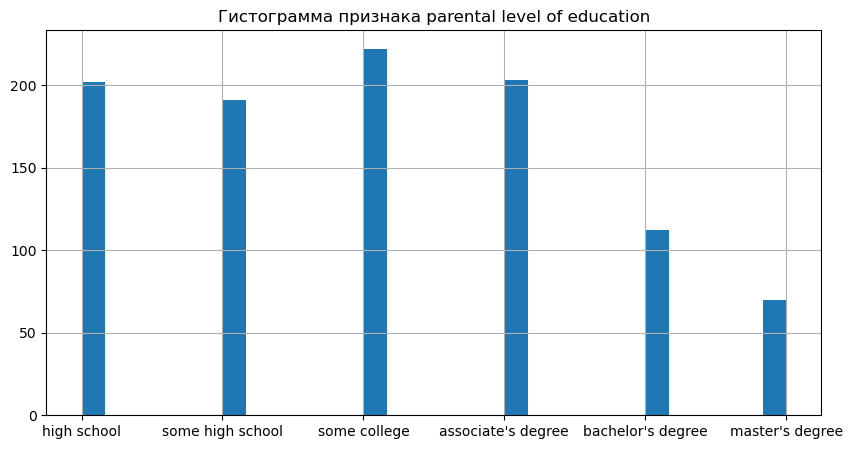

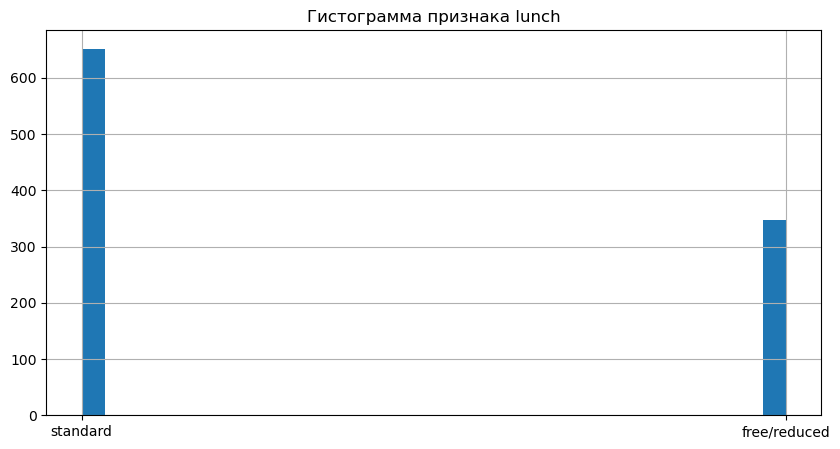

In [52]:
features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch']

for feature in features:
    plt.figure(figsize=(10,5))
    data[feature].hist(bins=30)
    plt.title(f'Гистограмма признака {feature}')
    plt.show()

Описание:

1. В целом количество мужчин и женщин одинаково, но мужчин немного больше
2. Раса/этническая принадлежность преобладают Group C и Group D
3. Гистограмма показывает, что меньше всего людей с образованием master's degree и bachelor's degree
4. Гистограмма показывает, что большинсвто получают стандартный ланч

## 8. Графики зависимости от целевой

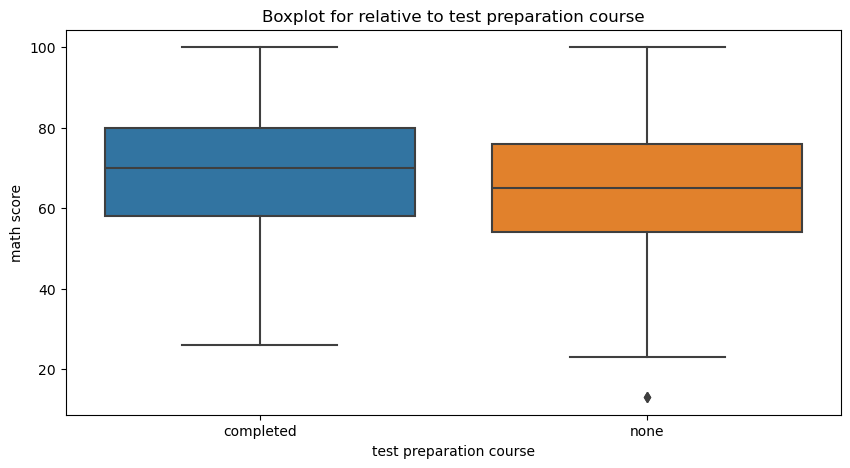

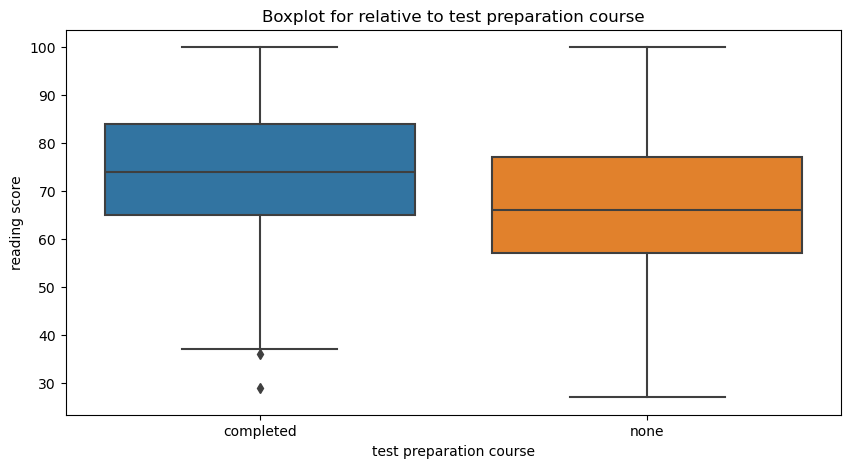

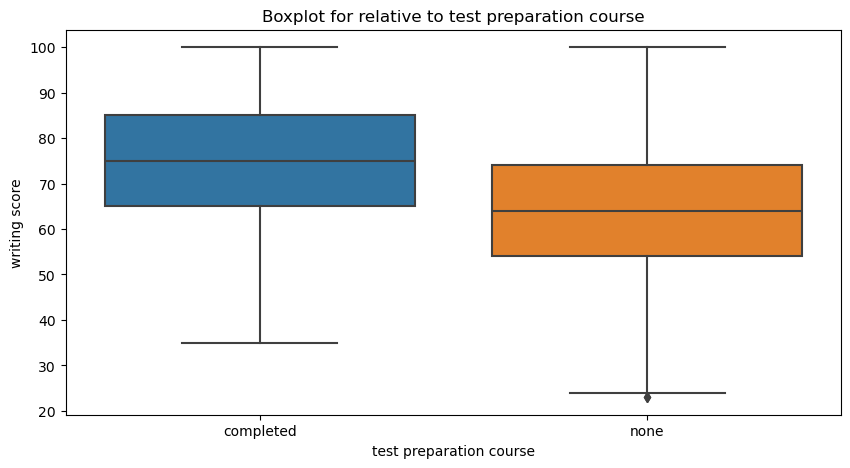

In [60]:
# Выбираем 3 переменных для анализа
selected_features = ['math score', 'reading score', 'writing score']

# Построение графиков
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data['test preparation course'], y=data[feature])
    plt.title(f'Boxplot for relative to test preparation course')
    plt.show()

Ящик с усами – это визуализация статистических характеристик распределения данных, таких как медиана, квартили и выбросы. Он помогает нам быстро оценить разброс и симметрию данных, а также выявить потенциальные аномалии.